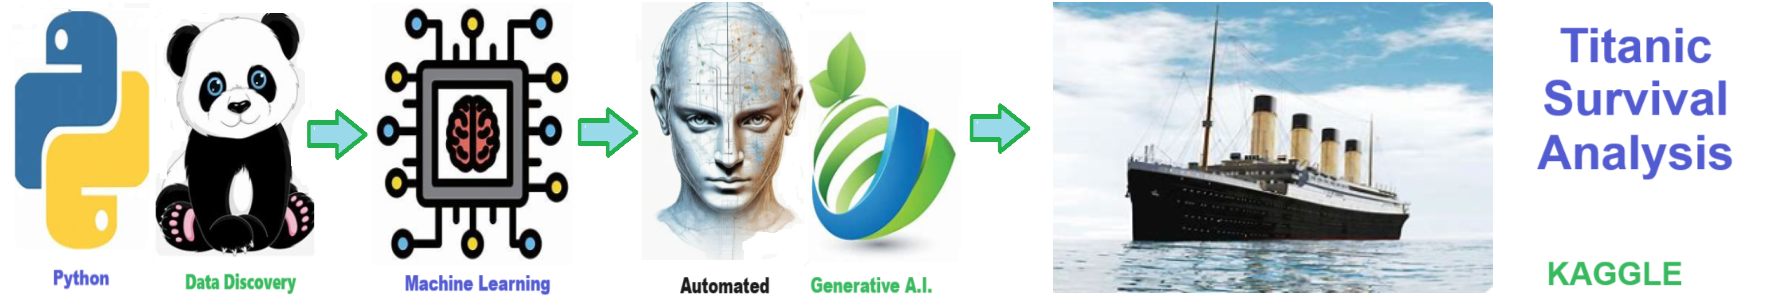

# Titanic Survival Analysis

## Classic Kaggle Machine Learning Challenge

#### Refactored by Joe Eberle started on 03-29-2024 - https://github.com/JoeEberle/ - josepheberle@outlook.com

In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import time
import zipfile
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-03-29 at 23:41:16.865901


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'solution_temple'

## Optional Step 0 - Intitiate Logging and debugging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process solution_temple Step 0 - Initializing and starting Logging Process.


##    The Titanic Passenger dataset provides information about passengers who were aboard the RMS Titanic during its


##  ill-fated maiden voyage. This dataset is often used for exploring patterns and factors associated with 
##  survival ## on the Titanic.

The dataset includes the following column
1. PassengerId: Unique identifier for each passenger.
2. Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).
3. 

PassengerId: Unique identifier for each passen
4. er.
Survived: Survival status of the passenger (0 = Not Survived, 1 = Survi
5. ed).
Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third c
6. ass).
Sex: Gender of the pas
7. Anger.
Age: Age of the pa
8. senger.
SibSp: Number of siblings/spouses aboard the
9. Titanic.
Parch: Number of parents/children aboard th
10.  Titanic.
Fare: Fare paid by the
11. passenger.
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Locate The datasets 

In [ ]:
titanic_train_data_set = "\

## Read in the Data Set 

In [6]:
df_titanic = pd.read_csv("titanic_train.csv")
data_set_name = "titanic passenger data" 
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Some initial facts about the data set. 

In [13]:
print(f"The {data_set_name} contains {df_titanic.shape[0]} rows and {df_titanic.shape[1]} columns") 
print(f"The {df_titanic.PassengerId.nunique()} distinct passenger IDs") 
print(f"The {df_titanic.Sex.nunique()} distinct genders") 
print(f"The {df_titanic.Embarked.nunique()} distinct places of embarkment") 
print(f"The {df_titanic.Survived.sum()} survived") 

The titanic passenger data contains 891 rows and 12 columns
The 891 distinct passenger IDs
The 2 distinct genders
The 3 distinct places of embarkment
The 342 survived


In [14]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 0 - Process End - display log

In [5]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-03-15 10:39:07,381 - INFO - START solution_temple =============================================
2024-03-15 10:39:07,381 - INFO - START solution_temple Start Time = 2024-03-15 10:39:07
2024-03-15 10:39:07,381 - INFO - solution_temple Step 0 - Initialize the configuration file parser
2024-03-15 10:39:07,382 - INFO - Process solution_temple Step 0 - Initializing and starting Logging Process.
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple The total process duration was:0.01
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Stop Time = 2024-03-15 10:39:07
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Short process duration less than 3 Seconds:0.01
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Performance optimization is not reccomended
2024-03-15 10:39:07,391 - INFO - END solution_temple =============================================



#### https://github.com/JoeEberle/ -- josepheberle@outlook.com